# Reading and Writing Audio Files with audioread

[back to overview page](index.ipynb)

The module `audioread` can be found there: https://github.com/beetbox/audioread

This isn't really an option because it has the same disadvantages as the wave module (and more) and it has to be installed manually (but at least it's available as Debian package).

Advantages:

* WAVEX seems to work
* seems to work for both Python 2 and 3

Disadvantages:

* always 16-bit values are returned (even if file has different data, e.g. pcm32, float32)
* manual de-interleaving and conversion is necessary
* ~~the number of channels is wrong in some cases (it should work for 1 and 2-channel files though)~~
* no error/warning messages if something goes wrong

Installation:

    python3 -m pip install audioread

## Reading

I don't recommend the module `audioread`, but you can have a look how it is supposed to work, anyway.

First, let's enable inline plotting and load the NumPy stuff:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Following code should read a 16-bit WAV file.

To convert it to floating point values and to normalize to a range from -1 to 1, we're using the function `pcm2float()`, located in the file [utility.py](utility.py).

sampling rate = 44100 Hz, duration = 0.0003401360544217687 seconds, channels = 7


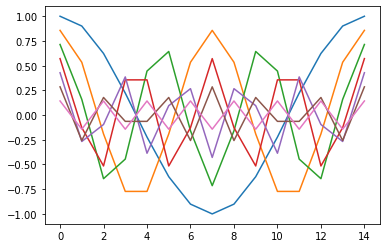

In [2]:
import audioread
import utility

temp = bytearray()
    
with audioread.audio_open('data/test_wav_pcm16.wav') as f:
    framerate = f.samplerate
    duration = f.duration
    nchannels = f.channels
    print("sampling rate = {framerate} Hz, duration = {duration} seconds, channels = {nchannels}".format(**locals()))

    # chunk size can be specified with 'block_samples' (default 1024):
    for chunk in f.read_data():
        temp.extend(chunk)

sig = np.frombuffer(temp, dtype='<i2').reshape(-1, nchannels)

normalized = utility.pcm2float(sig, np.float32)
plt.plot(normalized);

## Writing

TODO

## Version Info

In [3]:
import sys, numpy, IPython
print("Versions: NumPy = {}; IPython = {}".format(numpy.__version__, IPython.__version__))

print("Python interpreter:")
print(sys.version)

print("audioread version =", audioread.__version__)

Versions: NumPy = 1.16.2; IPython = 7.5.0.dev
Python interpreter:
3.7.4 (default, Jul 11 2019, 10:43:21) 
[GCC 8.3.0]
audioread version = 2.1.8


<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>